<h1>Walmart Sales Forecating Problem</h1>

In [ ]:
import seaborn as sns

# Define your custom palette as a list of hex codes
custom_palette = ['#FA6559', '#63C5DA','#343434']

# Set the palette to the custom palette
sns.set_palette(custom_palette)

# Now, all your Seaborn plots will use the colors from the custom palette you defined
sns.set_style("white")

<h2>Problem Statement</h2>

We have Sales data for Walmart Stores in 3 states(California,Texas,Wisconsin) for 3 categoies of data (HOBBIES,FOOD,HOSEHOLD) from year 2011 to 2016.We want to use this data to predict sales for next 28 days using several ML techniques.

In [ ]:
#Import All required packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
import multiprocessing as mp
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
sales_train_evaluation = pd.read_csv('/content/drive/MyDrive/m5-forecasting-uncertainty/sales_train_evaluation.csv')
sales_train_validation = pd.read_csv('/content/drive/MyDrive/m5-forecasting-uncertainty/sales_train_validation.csv')
sell_prices = pd.read_csv('/content/drive/MyDrive/m5-forecasting-uncertainty/sell_prices.csv')
calendar = pd.read_csv('/content/drive/MyDrive/m5-forecasting-uncertainty/calendar.csv')

df=calendar
df1=sales_train_validation
df2=sell_prices
df3=sales_train_evaluation

# Overview and cleaning

In [ ]:
#Clearly in calender.csv we have many entries which contain NaN in event_type_1,event_type_2,event_name_1 & enent_name_2
#I have replaced all those entries with no_event
df=df.fillna(value='no_event')

<h3>Preparing Data in Form one of Single DataFrame(Both Train,Testing)</h3>

In [ ]:
l=[]
for i in range(1,1914):
  l.append("d_"+str(i))
df_final=pd.melt(df1,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],\
                 value_vars=l,var_name="d",value_name="sales")

df_final.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sales  
0       CA  d_1      0  
1       CA  d_1      0  
2       CA  d_1      0  
3       CA  d_1      0  
4       CA  d_1      0

In [ ]:
#here I am taking only last 28 data days of test bcz eariler values are same as for train
l=[]
for i in range(1914,1942):
  l.append("d_"+str(i))
df_final_test=pd.melt(df3,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],\
                 value_vars=l,var_name="d",value_name="sales")
df_final_test.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id       d  sales  
0       CA  d_1914      0  
1       CA  d_1914      0  
2       CA  d_1914      0  
3       CA  d_1914      0  
4       CA  d_1914      1

In [ ]:
for i in range(1942,1970):
    df3['d_'+str(i)]=0

In [ ]:
#Also create future data to be used for futures sales data
l=[]
for i in range(1942,1970):
    l.append("d_"+str(i))
df_future_data=pd.melt(df3,id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],\
                 value_vars=l,var_name="d",value_name="sales")

In [ ]:
#Now we merge all These 3 dataframes to get final csv file train
data=df_final.merge(df,on='d',copy=False)# combine calender.csv and modified trainevaluation.csv on feature 'd'
data=data.merge(df2,on=["store_id", "item_id", "wm_yr_wk"],copy=False) # combine new dataframe with sell_price.csv usnig features "store_id", "item_id", "wm_yr_wk"
# I am storing this final dataframe to final_dataframe.csv

In [ ]:
data.to_csv('/content/drive/MyDrive/m5-forecasting-uncertainty/final_dataframe.csv',index=False)

In [ ]:
#Now we merge all These 3 dataframes to get final csv file test
data_test=df_final_test.merge(df,on='d',copy=False)# combine calender.csv and modified trainevaluation.csv on feature 'd'
data_test=data_test.merge(df2,on=["store_id", "item_id", "wm_yr_wk"],copy=False) # combine new dataframe with sell_price.csv usnig features "store_id", "item_id", "wm_yr_wk"
# I am storing this final dataframe to final_dataframe.csv

In [ ]:
data_test.to_csv('/content/drive/MyDrive/m5-forecasting-uncertainty/final_dataframe_test.csv',index=False)

In [ ]:
#Now we merge all These 3 dataframes to get final csv file future data
data_future=df_future_data.merge(df,on='d',copy=False)# combine calender.csv and modified trainevaluation.csv on feature 'd'
data_future=data_future.merge(df2,on=["store_id", "item_id", "wm_yr_wk"],copy=False) # combine new dataframe with sell_price.csv usnig features "store_id", "item_id", "wm_yr_wk"
# I am storing this final dataframe to final_future_data.csv
data_future.fillna('no_event',inplace=True)

In [ ]:
data_future.to_csv('/content/drive/MyDrive/m5-forecasting-uncertainty/final_future_data.csv',index=False)

In [ ]:
print("Shape of final dataframe train is=",data.shape)
print("Shape of final dataframe test is=",data_test.shape)

Shape of final dataframe train is= (46027957, 22)
Shape of final dataframe test is= (853720, 22)


In [ ]:
print("Shape of final dataframe future is=",data_future.shape)

Shape of final dataframe future is= (853720, 22)


**Clearly this is huge amount of data**

In [ ]:
#reading up complete dataframe
data=pd.read_csv('/content/drive/MyDrive/m5-forecasting-uncertainty/final_dataframe.csv')
data_test=pd.read_csv('/content/drive/MyDrive/m5-forecasting-uncertainty/final_dataframe_test.csv')

In [ ]:
r=data[data['state_id']=='TX'].groupby(['state_id','store_id','cat_id','dept_id'])['id'].nunique().reset_index()
r

state_id store_id     cat_id      dept_id   id
0        TX     TX_1      FOODS      FOODS_1  203
1        TX     TX_1      FOODS      FOODS_2  323
2        TX     TX_1      FOODS      FOODS_3  677
3        TX     TX_1    HOBBIES    HOBBIES_1  373
4        TX     TX_1    HOBBIES    HOBBIES_2  110
5        TX     TX_1  HOUSEHOLD  HOUSEHOLD_1  434
6        TX     TX_1  HOUSEHOLD  HOUSEHOLD_2  436
7        TX     TX_2      FOODS      FOODS_1  203
8        TX     TX_2      FOODS      FOODS_2  326
9        TX     TX_2      FOODS      FOODS_3  676
10       TX     TX_2    HOBBIES    HOBBIES_1  371
11       TX     TX_2    HOBBIES    HOBBIES_2  124
12       TX     TX_2  HOUSEHOLD  HOUSEHOLD_1  437
13       TX     TX_2  HOUSEHOLD  HOUSEHOLD_2  436
14       TX     TX_3      FOODS      FOODS_1  202
15       TX     TX_3      FOODS      FOODS_2  306
16       TX     TX_3      FOODS      FOODS_3  669
17       TX     TX_3    HOBBIES    HOBBIES_1  364
18       TX     TX_3    HOBBIES    HOBBIES_2  125
19       TX     TX_3  HOUSEHOLD  HOUSEHOLD_1  434
20       TX     TX_3  HOUSEHOLD  HOUSEHOLD_2  434

<h1>Exploring various properties of DataFrame</h1>

In [ ]:
print("Head rows of Final DataFrame train")
data.head()

Head rows of Final DataFrame train


id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_008_CA_1_validation  HOBBIES_1_008  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_008_CA_1_validation  HOBBIES_1_008  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_008_CA_1_validation  HOBBIES_1_008  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_008_CA_1_validation  HOBBIES_1_008  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_008_CA_1_validation  HOBBIES_1_008  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sales        date  wm_yr_wk  ... month  year  event_name_1  \
0       CA  d_1     12  2011-01-29     11101  ...     1  2011      no_event   
1       CA  d_2     15  2011-01-30     11101  ...     1  2011      no_event   
2       CA  d_3      0  2011-01-31     11101  ...     1  2011      no_event   
3       CA  d_4      0  2011-02-01     11101  ...     2  2011      no_event   
4       CA  d_5      0  2011-02-02     11101  ...     2  2011      no_event   

   event_type_1 event_name_2 event_type_2 snap_CA snap_TX  snap_WI  sell_price  
0      no_event     no_event     no_event       0       0        0        0.46  
1      no_event     no_event     no_event       0       0        0        0.46  
2      no_event     no_event     no_event       0       0        0        0.46  
3      no_event     no_event     no_event       1       1        0        0.46  
4      no_event     no_event     no_event       1       0        1        0.46  

[5 rows x 22 columns]

<b>Clearly this data frame is using a lot memory(7.7+GB) so we will try to remove unnecessary features
    while doing Feature Engineering </b>

In [ ]:
print("There are these unique stores in this data=",data['store_id'].unique())

There are these unique stores in this data= ['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']


In [ ]:
print("There are these sates in data=",data['state_id'].unique())

There are these sates in data= ['CA' 'TX' 'WI']


In [ ]:
print("Unique values of wday features=",data['wday'].unique())
print("Unique values of weekday features=",data['weekday'].unique())

Unique values of wday features= [1 2 3 4 5 6 7]
Unique values of weekday features= ['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']


<b>1. From this i get that 1 in wday corresponds to Saturday in weekday,2 for Sunday and so on.</b>

In [ ]:
print("years for which I have this sales data=",data['year'].unique())

years for which I have this sales data= [2011 2012 2013 2014 2015 2016]


In [ ]:
print("Months in year 2016 for which we have data",data[data['year']==2016]['month'].unique())

Months in year 2016 for which we have data [1 2 3 4]


<b>Note:-</b>Here we have data for year 2016 for only 5 months(5th month for test data).

<h1>Exploratory Data Analysis</h1>

<ipython-input-23-fbd19e7877d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-23-fbd19e7877d1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month'] = df['date'].dt.to_period('M')


<Figure size 1000x600 with 0 Axes>

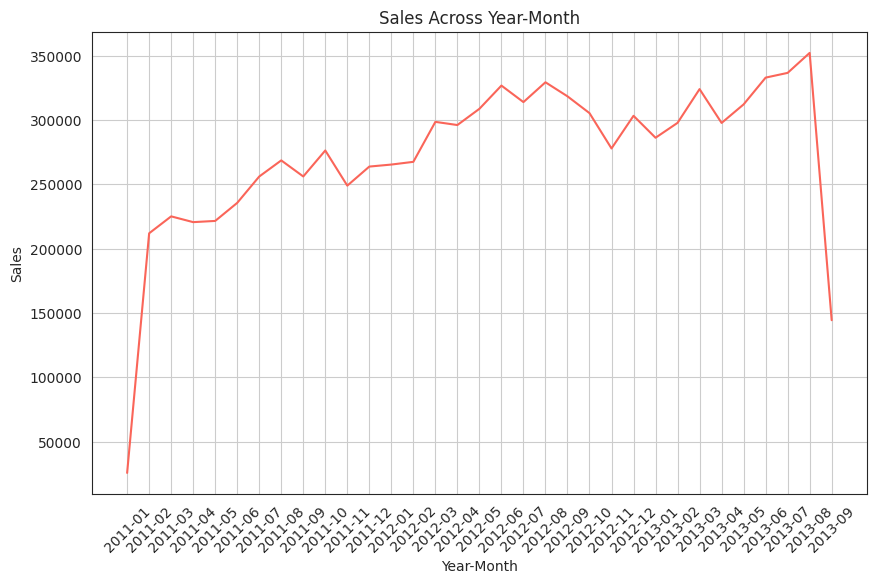

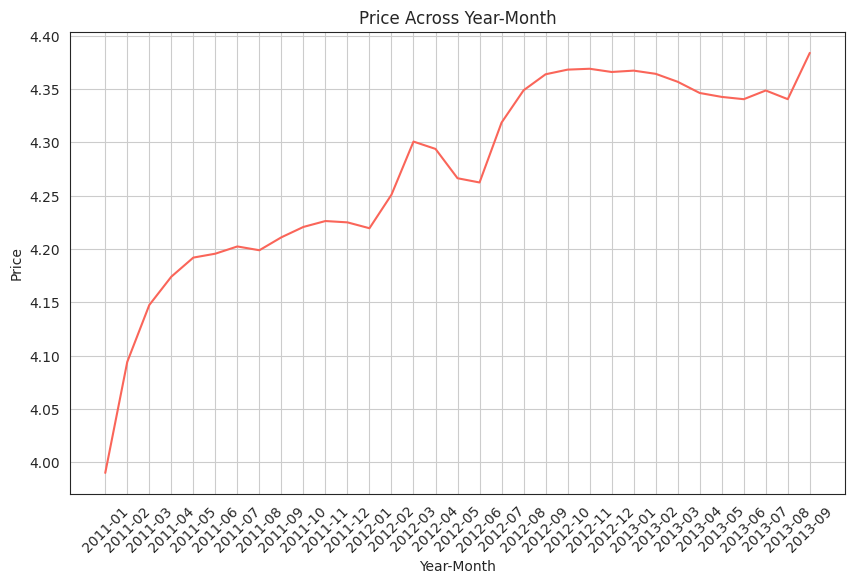

In [23]:
# Plotting sales
plt.figure(figsize=(10, 6))
df= data[data['state_id']=='TX']
# Aggregate data to year-month level
df['date'] = pd.to_datetime(df['date'])
# Aggregate data to year-month level
df['year_month'] = df['date'].dt.to_period('M')
df_agg = df.groupby('year_month').agg({'sales': 'sum', 'sell_price': 'mean'}).reset_index()

# Convert year_month to string
df_agg['year_month'] = df_agg['year_month'].astype(str)

# Plotting sales
plt.figure(figsize=(10, 6))
plt.plot(df_agg['year_month'], df_agg['sales'])
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.title('Sales Across Year-Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

# Plotting price
plt.figure(figsize=(10, 6))
plt.plot(df_agg['year_month'], df_agg['sell_price'])
plt.xlabel('Year-Month')
plt.ylabel('Price')
plt.title('Price Across Year-Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

<h2> 1. Some Bar Plots of Pie Charts of sales</h2>

<h3> A. Bargraph for Average sales for each category & Pie chart showing percentage of sales for each category</h3>

<h4>Train</h4>

<ipython-input-11-60c05c5dcb3f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=data[data['state_id']=='TX'].groupby('cat_id').mean()
<ipython-input-11-60c05c5dcb3f>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=data[data['state_id']=='TX'].groupby('cat_id').sum()


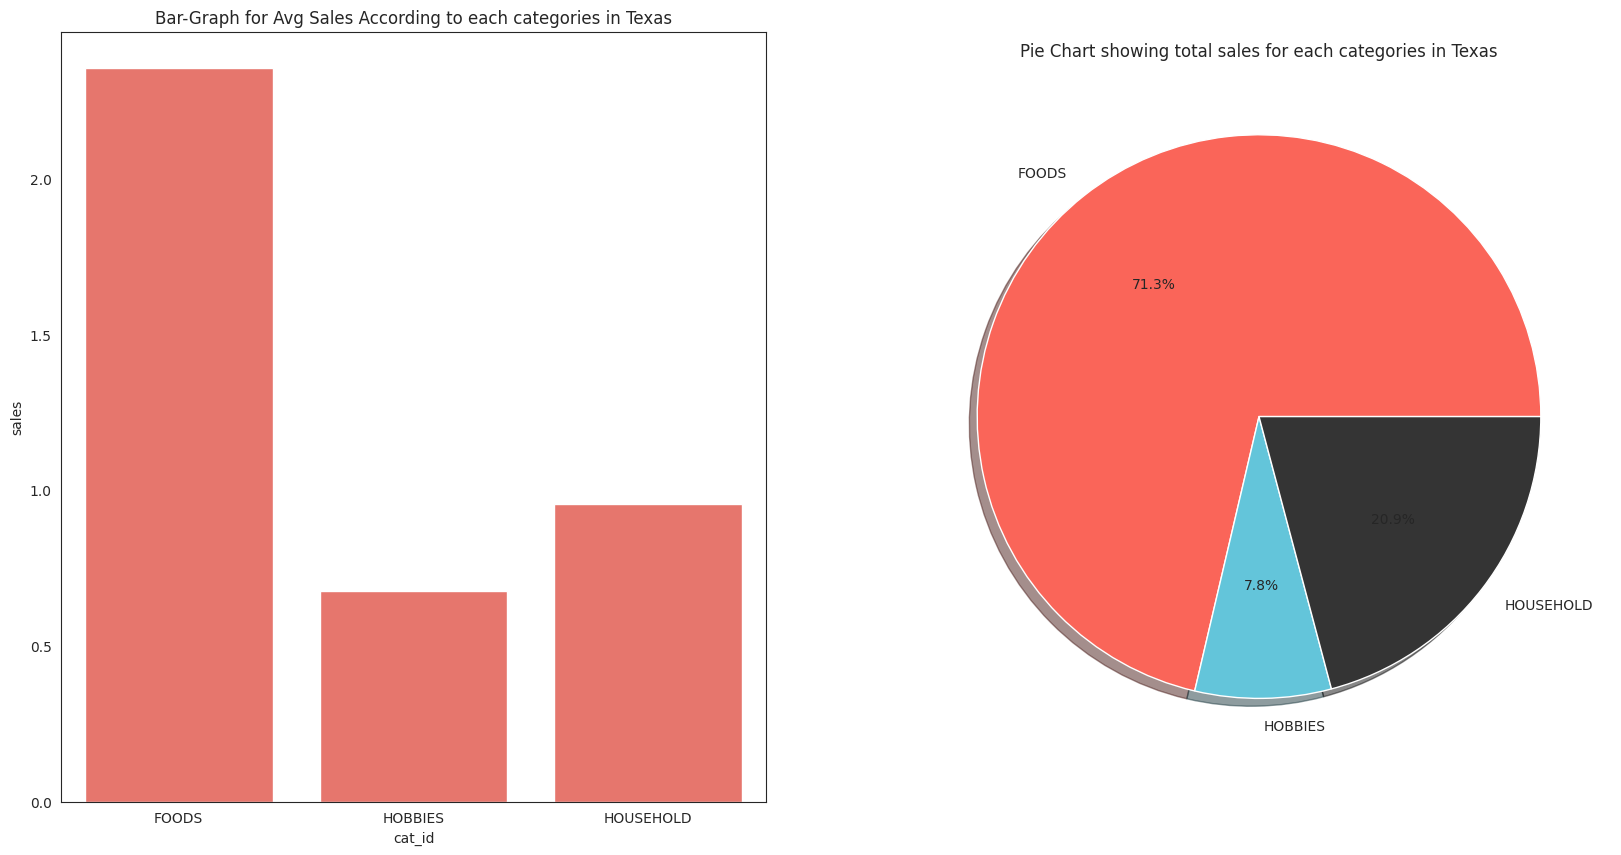

In [11]:
#Total Sales for each Category(Bar Graph + Pie chart)
df=data[data['state_id']=='TX'].groupby('cat_id').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='cat_id',y='sales',data=df)
plt.title("Bar-Graph for Avg Sales According to each categories in Texas")

plt.subplot(122)
df=data[data['state_id']=='TX'].groupby('cat_id').sum()
df.reset_index(level=0,inplace=True)
df['perc']=df['sales']/sum(df['sales'].values)*100
plt.pie(df['perc'].values,labels=df['cat_id'].values,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart showing total sales for each categories in Texas")
plt.show()

<h3> B. Bargraph for Average sales for each State & Pie chart showing percentage of sales for each State</h3>

<b>Train</b>

<ipython-input-44-61ced3f5dfc4>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=data.groupby('state_id').mean()
<ipython-input-44-61ced3f5dfc4>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=data.groupby('state_id').sum()


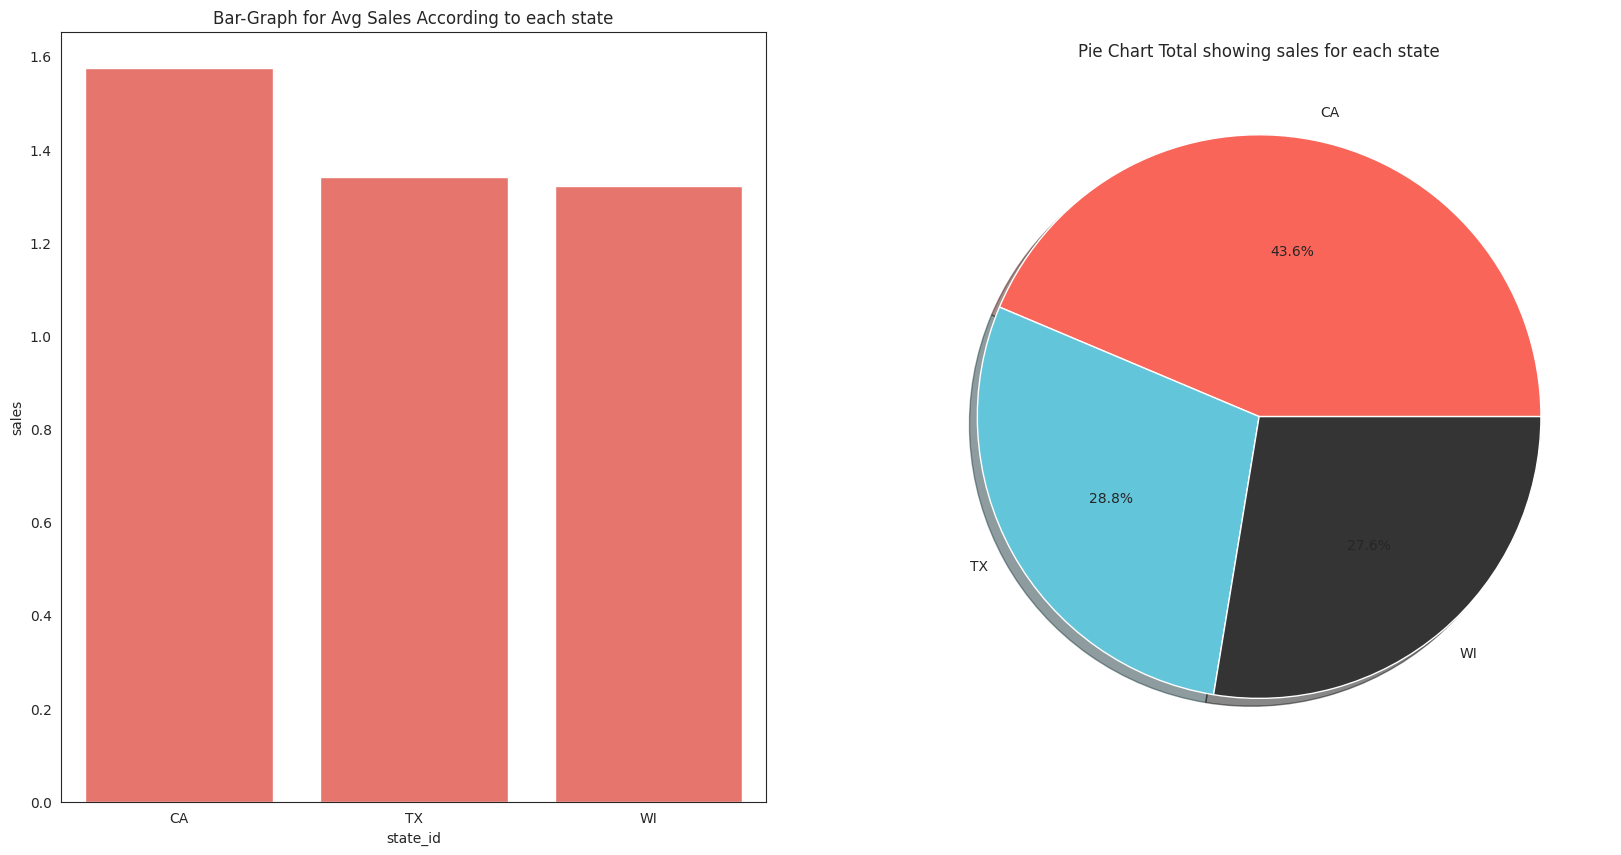

In [ ]:
#Total Sales for each State(Barplot+Pie Chart)
#https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html
df=data.groupby('state_id').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='state_id',y='sales',data=df)
plt.title("Bar-Graph for Avg Sales According to each state")

df=data.groupby('state_id').sum()
df.reset_index(level=0,inplace=True)
df['perc']=df['sales']/sum(df['sales'].values)*100
plt.subplot(122)
plt.pie(df['perc'].values,labels=df['state_id'].values,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart Total showing sales for each state")
plt.show()

<h3> C. Bargraph for Average sales for each Store & Pie chart showing percentage of sales for each Store</h3>

<b>Train</b>

<ipython-input-8-6ad68140dc1a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=data[data['state_id']=='TX'].groupby('store_id').mean()
<ipython-input-8-6ad68140dc1a>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=data[data['state_id']=='TX'].groupby('store_id').sum()


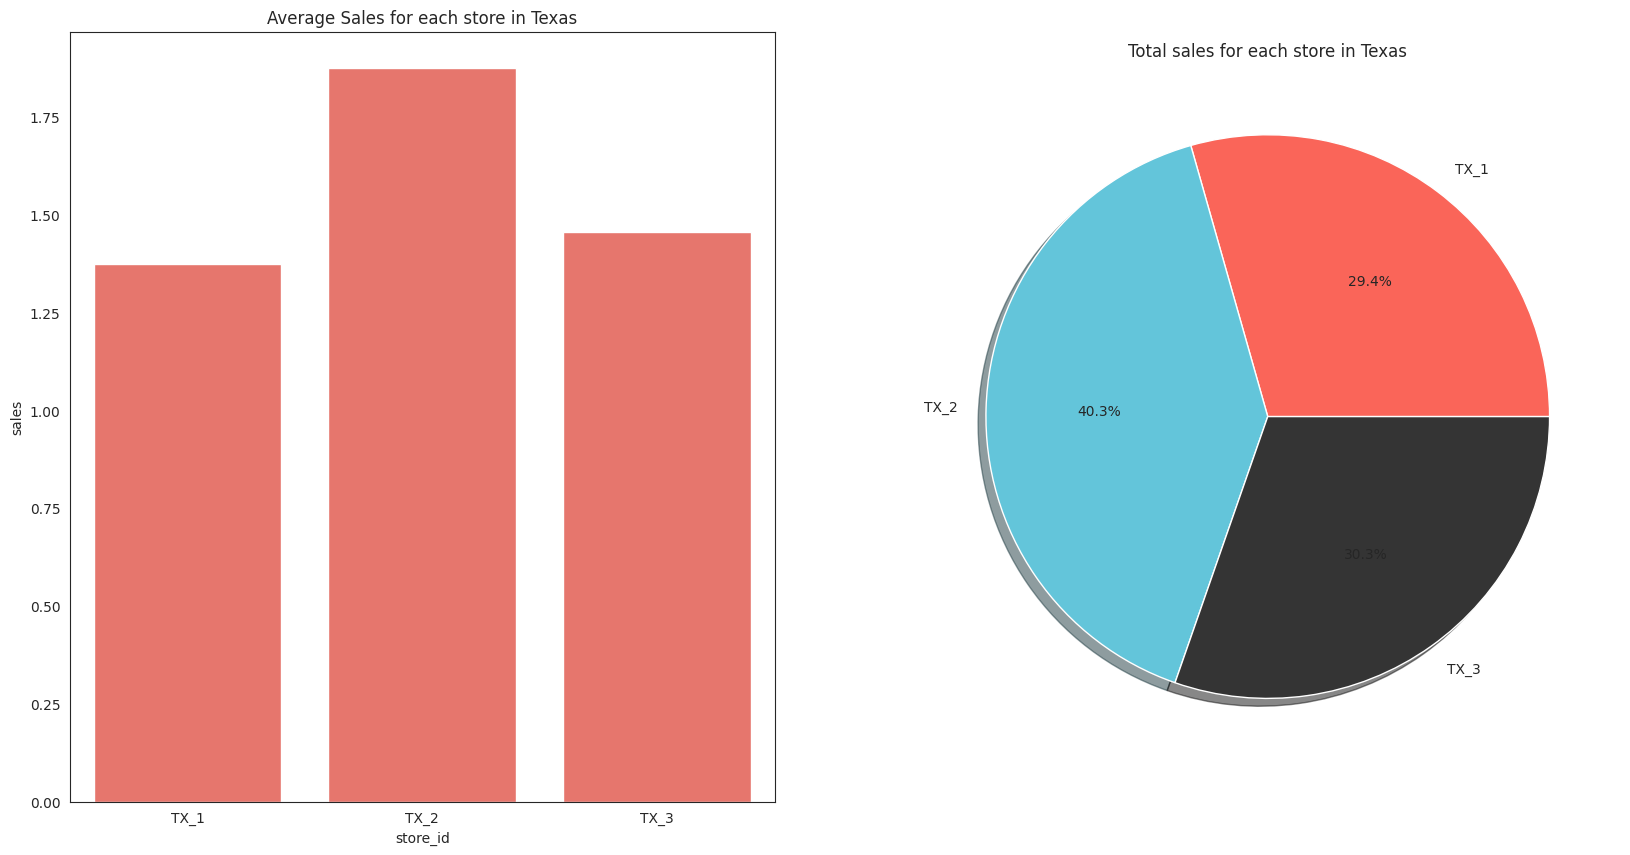

In [ ]:
#Total Sales for each store(Bargraph+pieChart)
#https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html
df=data[data['state_id']=='TX'].groupby('store_id').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='store_id',y='sales',data=df)
plt.title("Average Sales for each store in Texas")
df=data[data['state_id']=='TX'].groupby('store_id').sum()
df.reset_index(level=0,inplace=True)
df['perc']=df['sales']/sum(df['sales'].values)*100
plt.subplot(122)
plt.pie(df['perc'].values,labels=df['store_id'].values,shadow=True,autopct='%1.1f%%')
plt.title("Total sales for each store in Texas")

plt.show()

<h3> D. Bargraph for Average sales for each Weekday & Pie chart showing percentage of sales for each Department</h3>

<b>Train</b>

<ipython-input-10-f7093dd3e6a7>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=data[data['state_id']=='TX'].groupby('dept_id').mean()
<ipython-input-10-f7093dd3e6a7>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=data[data['state_id']=='TX'].groupby('dept_id').sum()


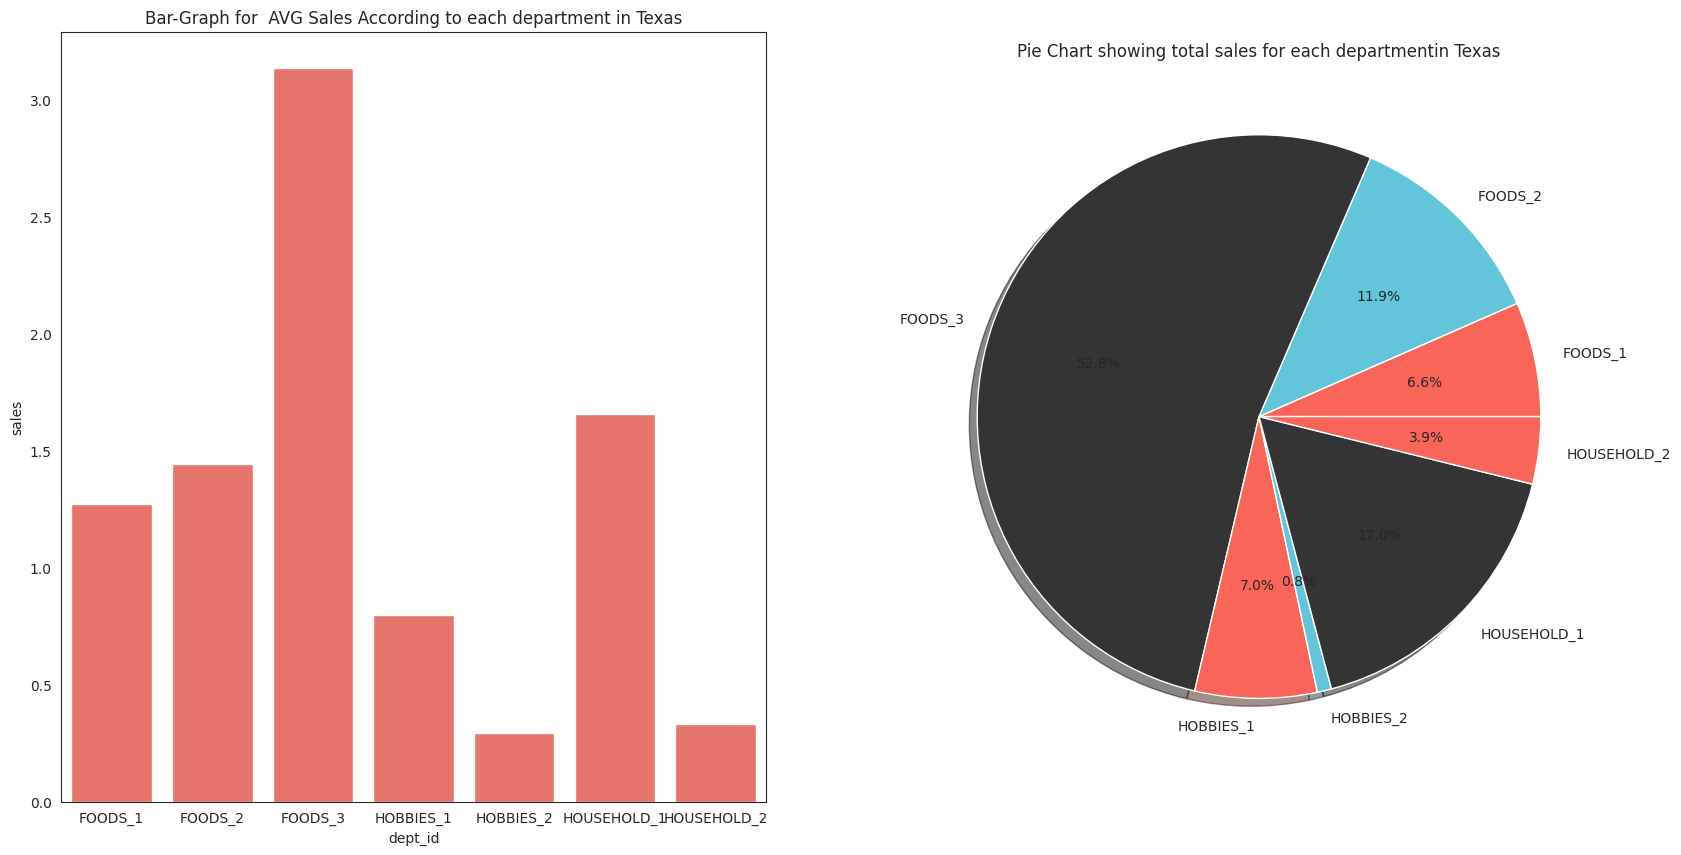

In [ ]:
#Total Sales for each store(Bargraph+pieChart)
#https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html
df=data[data['state_id']=='TX'].groupby('dept_id').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='dept_id',y='sales',data=df)
plt.title("Bar-Graph for  AVG Sales According to each department in Texas")
df=data[data['state_id']=='TX'].groupby('dept_id').sum()
df.reset_index(level=0,inplace=True)
df['perc']=df['sales']/sum(df['sales'].values)*100
plt.subplot(122)
plt.pie(df['perc'].values,labels=df['dept_id'].values,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart showing total sales for each departmentin Texas")

plt.show()

<h3> E. Bargraph for Average sales for each Weekday & Pie chart showing percentage of sales for each Week</h3>

<b>Train</b>

<ipython-input-47-3cac2ec00a74>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=data.groupby('wday').mean()
<ipython-input-47-3cac2ec00a74>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=data.groupby('wday').sum()


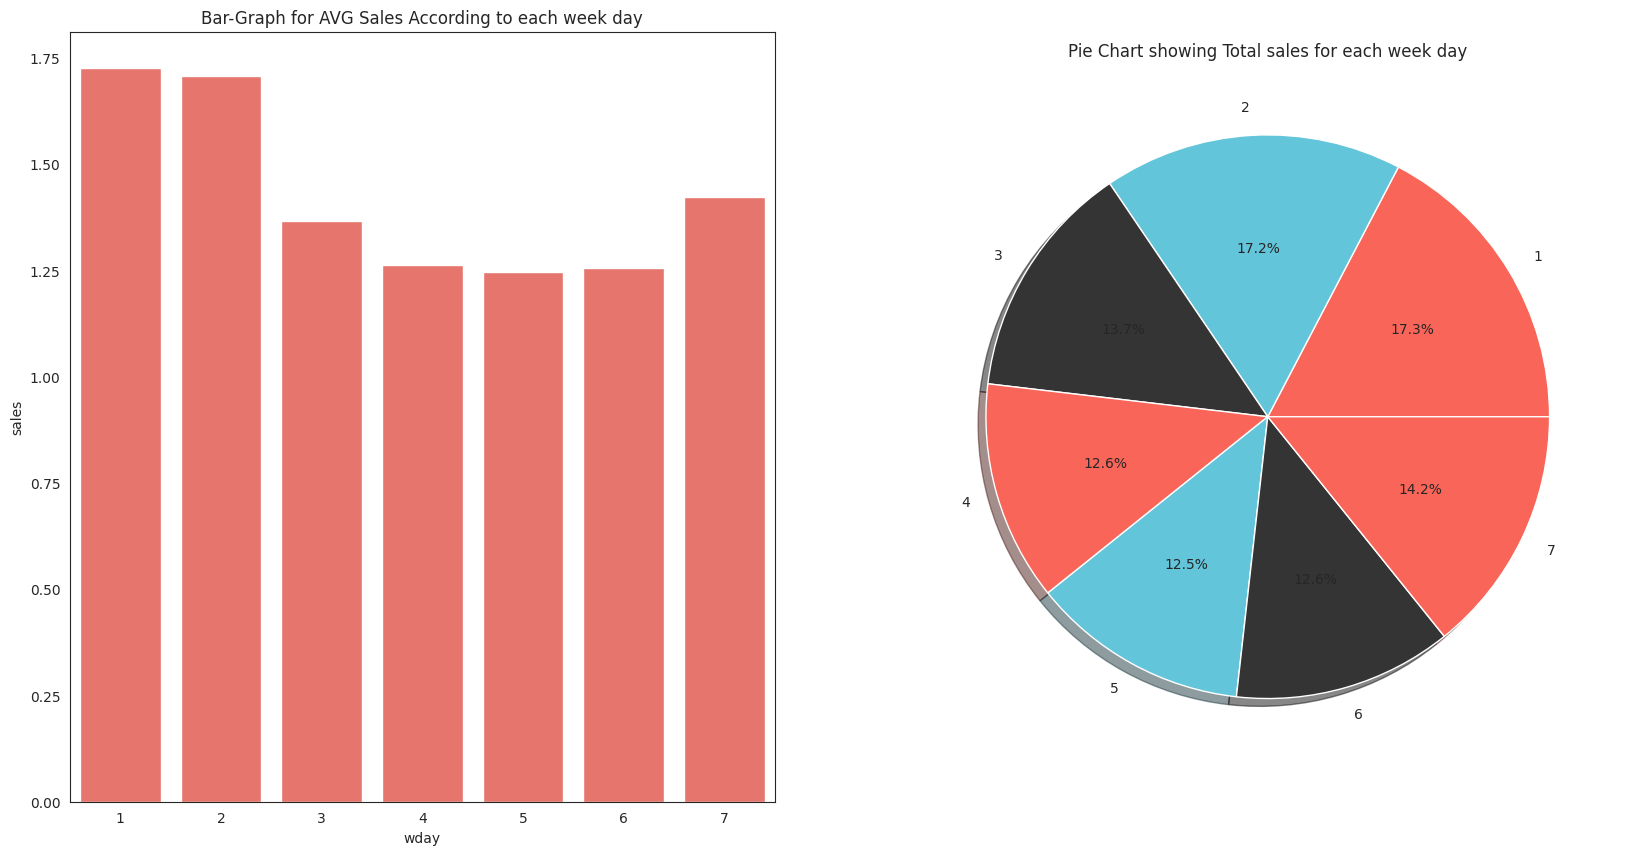

In [ ]:
#Total Sales for each day of week(Barplot+PieChart)
#https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html
df=data.groupby('wday').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='wday',y='sales',data=df)
plt.title("Bar-Graph for AVG Sales According to each week day")

df=data.groupby('wday').sum()
df.reset_index(level=0,inplace=True)
df['perc']=df['sales']/sum(df['sales'].values)*100
plt.subplot(122)
plt.pie(df['perc'].values,labels=df['wday'].values,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart showing Total sales for each week day")

plt.show()

<h3> F. Bargraph for Average sales for each Month & Pie chart showing percentage of sales for each Month</h3>

<b>Train</b>

<ipython-input-48-3caab8495c81>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=data.groupby('month').mean()
<ipython-input-48-3caab8495c81>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=data.groupby('month').sum()


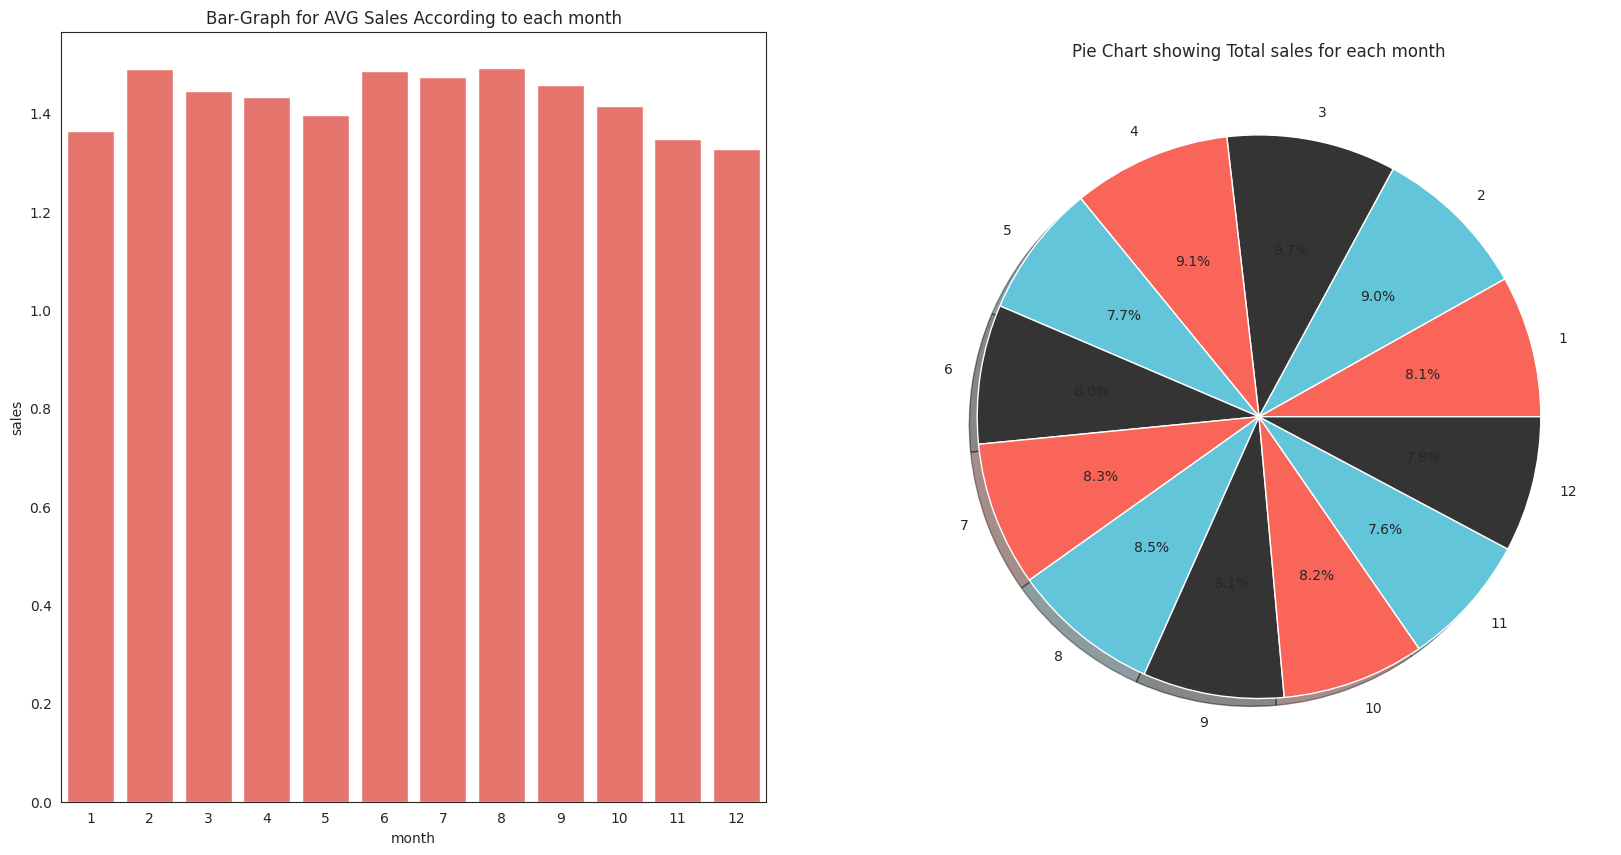

In [ ]:
#Total Sales for each month(Barplot+pie chart)
#https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html
df=data.groupby('month').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='month',y='sales',data=df)
plt.title("Bar-Graph for AVG Sales According to each month")

df=data.groupby('month').sum()
df.reset_index(level=0,inplace=True)
df['perc']=df['sales']/sum(df['sales'].values)*100
plt.subplot(122)
plt.pie(df['perc'].values,labels=df['month'].values,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart showing Total sales for each month")

plt.show()

<h3> G. Bargraph for Average sales for each year & Pie chart showing percentage of sales for each year</h3>

<b>Train</b>

<ipython-input-49-f58ee96cb66e>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=data.groupby('year').mean()
<ipython-input-49-f58ee96cb66e>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=data.groupby('year').sum()


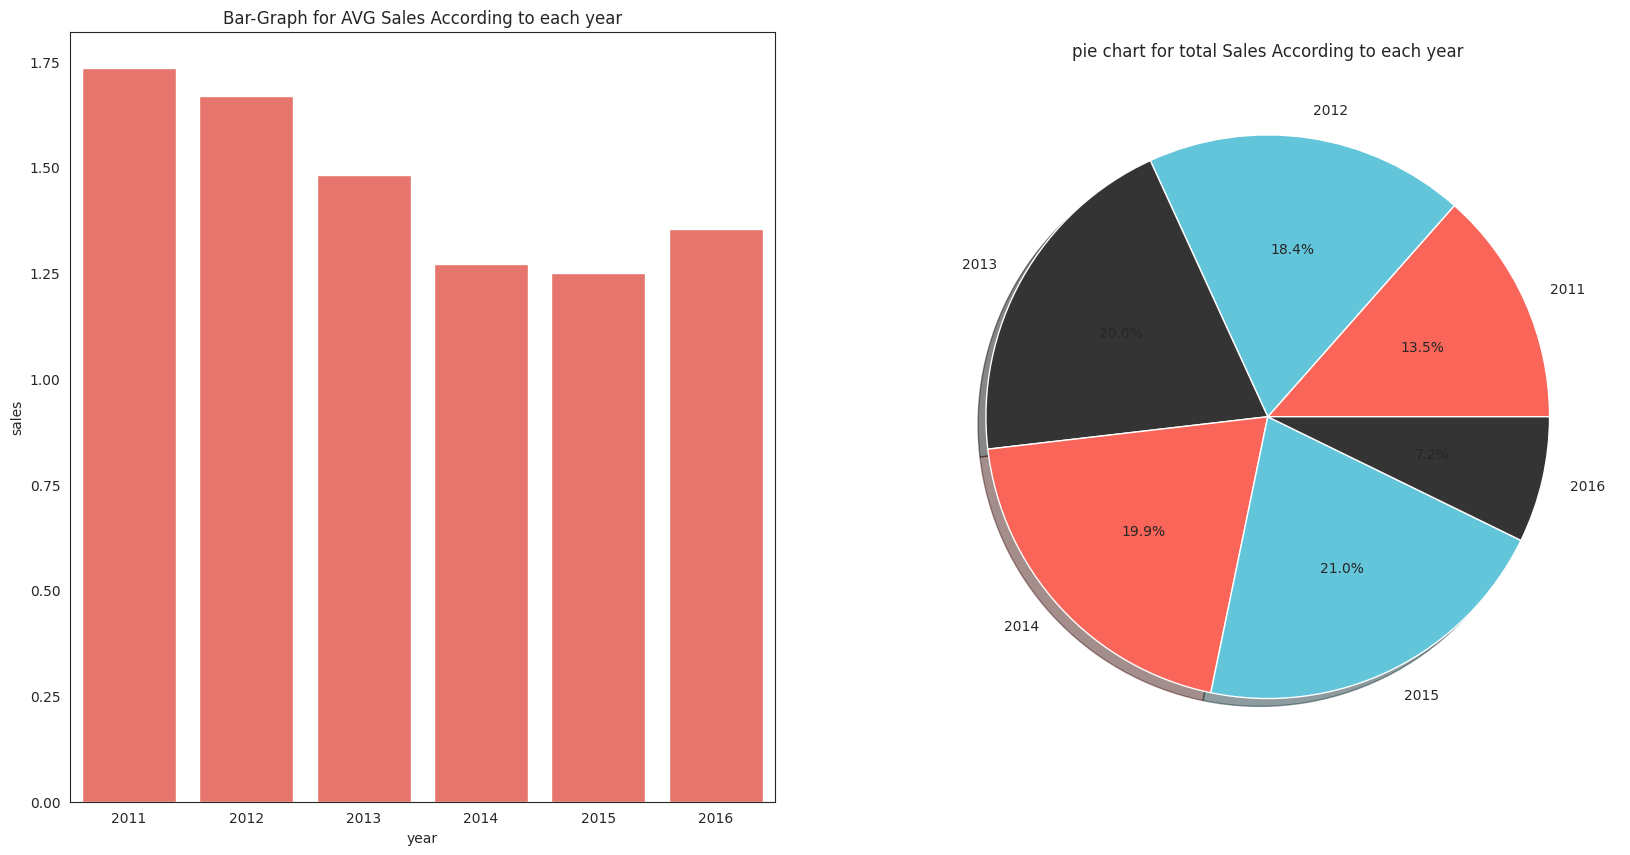

In [ ]:
#Total Sales for each year(bar plot+pie chart)
#https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

df=data.groupby('year').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)

sns.barplot(x='year',y='sales',data=df)
plt.title("Bar-Graph for AVG Sales According to each year")

plt.subplot(122)
df=data.groupby('year').sum()
df.reset_index(level=0,inplace=True)
df['year_avg']=df['sales']/sum(df['sales'].values)*100
plt.pie(df['year_avg'].values,labels=df['year'].values,shadow=True,autopct='%1.1f%%')

plt.title("pie chart for total Sales According to each year")
plt.show()

<h3> I.Bargraph for Average sales according to snap_tx value & Pie chart showing percentage of sales according to snap_tx value </h3>

<b>Train</b>

<ipython-input-51-73a5d0784bfc>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=data.groupby('snap_TX').mean()
<ipython-input-51-73a5d0784bfc>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=data.groupby('snap_TX').sum()


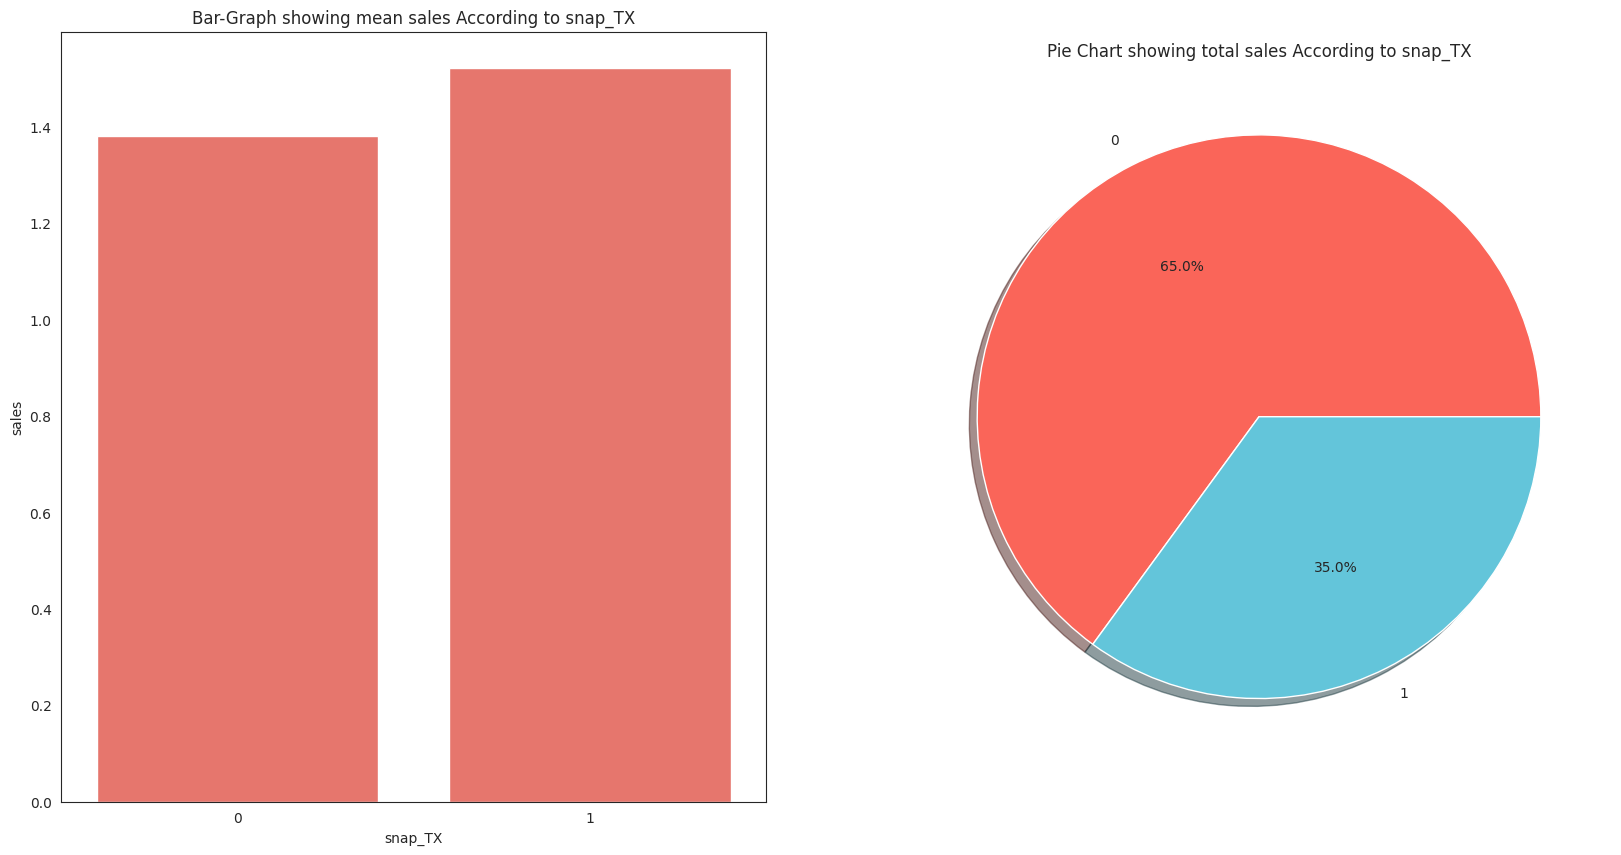

In [ ]:
#sales Variation according to snap_TX(Barplot+pie chart)
#https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

df=data.groupby('snap_TX').mean()
df.reset_index(level=0,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.barplot(x='snap_TX',y='sales',data=df)
plt.title("Bar-Graph showing mean sales According to snap_TX")

df=data.groupby('snap_TX').sum()
df.reset_index(level=0,inplace=True)
df['snap']=df['sales']/sum(df['sales'].values)*100
plt.subplot(122)
plt.pie(df['snap'].values,labels=df['snap_TX'].values,shadow=True,autopct='%1.1f%%')
plt.title("Pie Chart showing total sales According to snap_TX")

plt.show()

<h3> J.Bargraph for Average sales according to snap_wi value & Pie chart showing percentage of sales according to snap_wi value </h3>

<h3> K.Bargraph for Average sales according to 2 event types & Pie chart showing percentage of sales according to 2 event types </h3>

<b>Train</b>

<ipython-input-53-b37ad9a7a03e>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=data.groupby(['event_type_1','event_type_2']).mean()
<ipython-input-53-b37ad9a7a03e>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=data.groupby(['event_type_1','event_type_2']).sum()


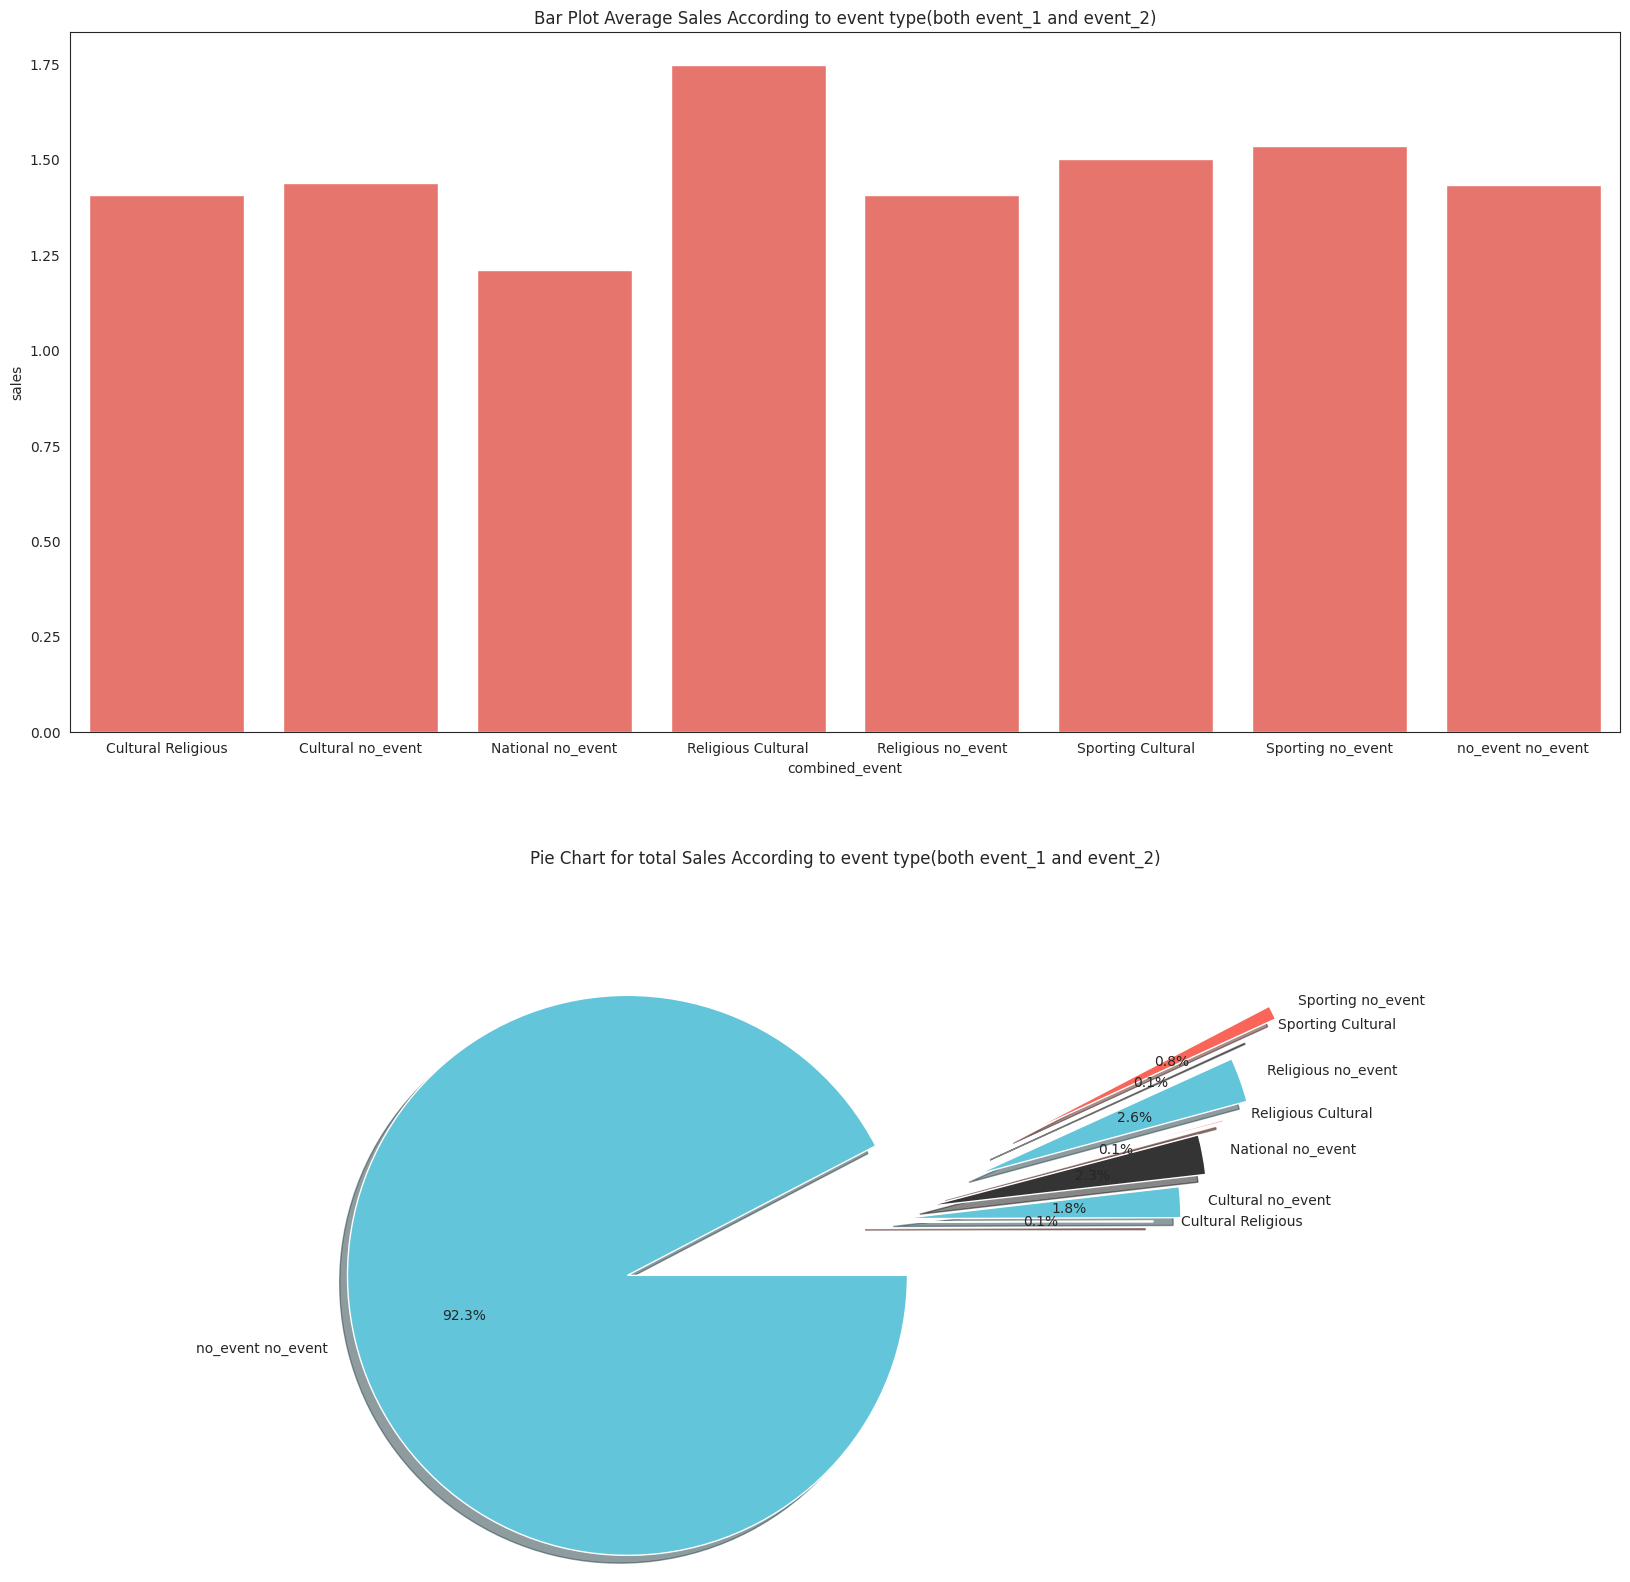

In [ ]:
#Sales According to Event_type(both bar graph and pie chart)
#https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

df=data.groupby(['event_type_1','event_type_2']).mean()
df.reset_index(level=[0,1],inplace=True)
df['combined_event']=df['event_type_1']+" "+df['event_type_2']
plt.figure(figsize=(20,20))
plt.subplot(211)
sns.barplot(x='combined_event',y='sales',data=df)
plt.title("Bar Plot Average Sales According to event type(both event_1 and event_2)")
df=data.groupby(['event_type_1','event_type_2']).sum()
df.reset_index(level=[0,1],inplace=True)
df['combined_event']=df['event_type_1']+" "+df['event_type_2']
plt.subplot(212)
df['sales_total']=df['sales']/sum(df['sales'].values)*100
explode = (0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8)
plt.pie(df['sales_total'].values,labels=df['combined_event'].values,shadow=True,autopct='%1.1f%%',explode=explode)
plt.title("Pie Chart for total Sales According to event type(both event_1 and event_2)")
plt.show()

<h2>2. Last 30 Days Sales According to Stores for various products</h2>

<h3>C. Sales of last 30 days for all stores of Texas for item HOUSEHOLD_1_526</h3>

<b>Train</b>

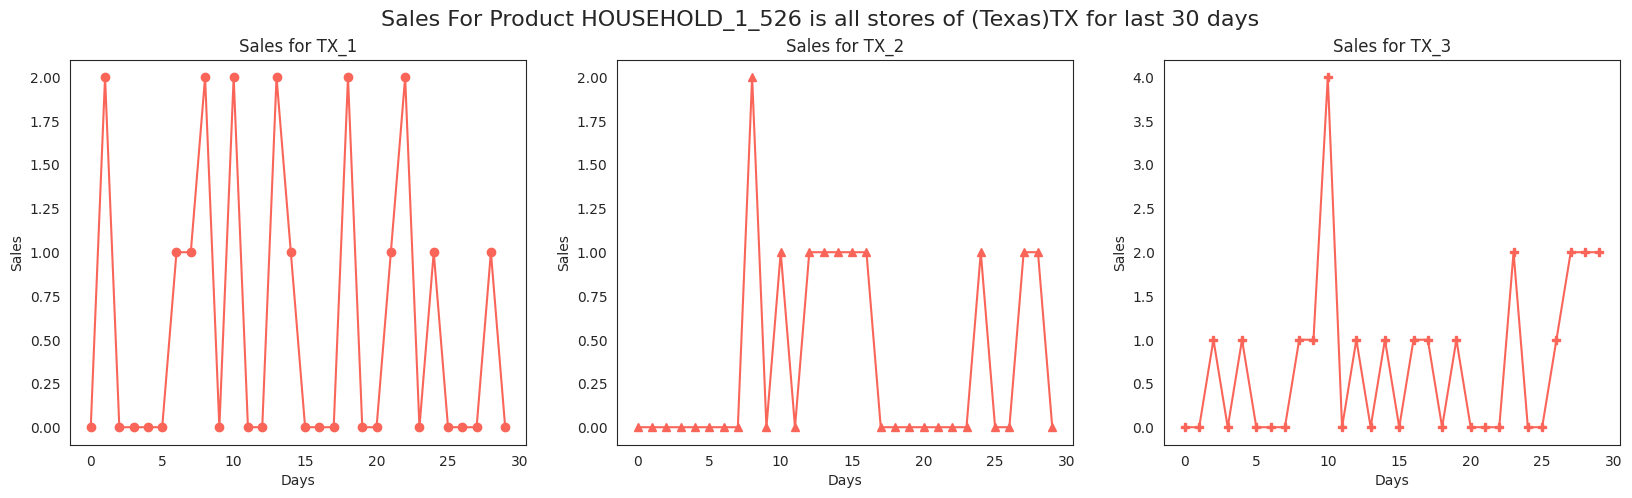

In [ ]:
#Now visualse sales for last 30 days for item HOUSEHOLD_2_516 in state CA
df1=data[(data['item_id']=='HOUSEHOLD_1_526')&(data['store_id']=='TX_1')]
df2=data[(data['item_id']=='HOUSEHOLD_1_526')&(data['store_id']=='TX_2')]
df3=data[(data['item_id']=='HOUSEHOLD_1_526')&(data['store_id']=='TX_3')]



df1=df1.sort_values(by='date')
df2=df2.sort_values(by='date')
df3=df3.sort_values(by='date')


plt.figure(figsize=(20,5))
plt.subplot(131)
plt.plot(df1['sales'].values[-30:],marker="o")
plt.xlabel("Days")
plt.ylabel("Sales")
plt.title("Sales for TX_1")

plt.subplot(132)
plt.plot(df2['sales'].values[-30:],marker="^")
plt.xlabel("Days")
plt.ylabel("Sales")
plt.title("Sales for TX_2")

plt.subplot(133)
plt.plot(df3['sales'].values[-30:],marker="P")
plt.xlabel("Days")
plt.ylabel("Sales")
plt.title("Sales for TX_3")

plt.suptitle("Sales For Product HOUSEHOLD_1_526 is all stores of (Texas)TX for last 30 days",fontsize=16)
plt.show()

<h2>3. Sales According to year & month for Various States</h2>

<b>Train</b>

<ipython-input-57-c9fe376d3d6b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=data.groupby(['year','month','state_id']).sum()
<ipython-input-57-c9fe376d3d6b>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['state_id']=="CA"]['sales'].values)
<ipython-input-57-c9fe376d3d6b>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function 

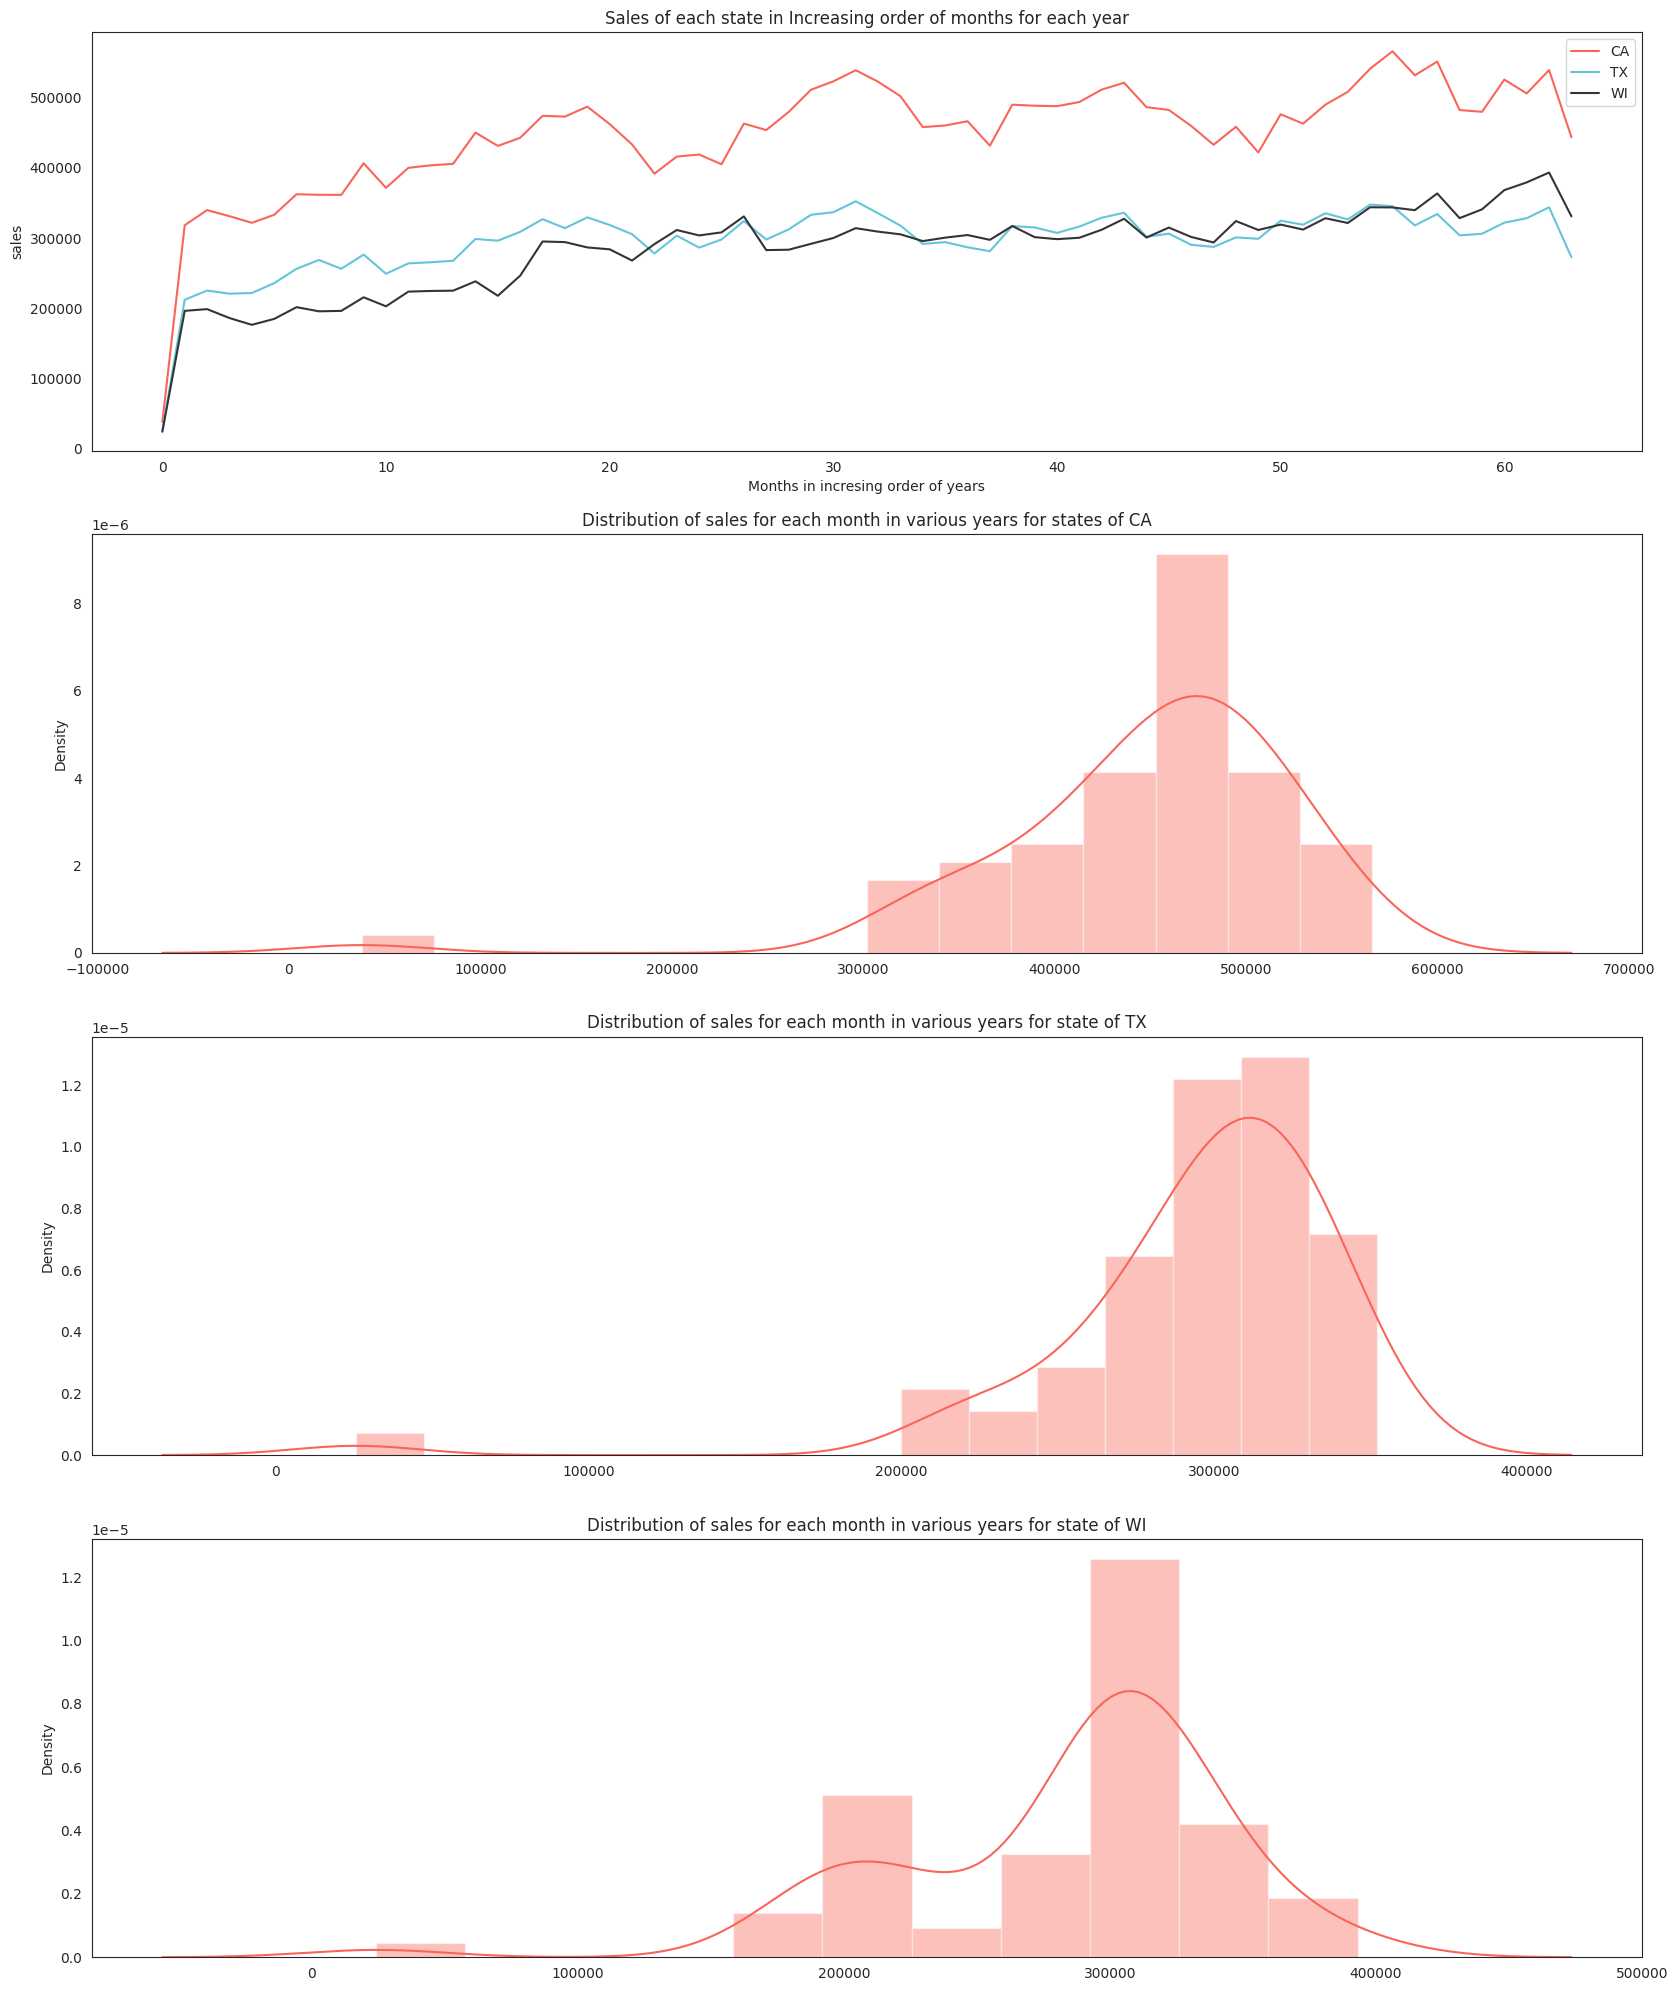

In [ ]:
df=data.groupby(['year','month','state_id']).sum()
df.reset_index(level=[0,1,2],inplace=True)
plt.figure(figsize=(20,25))
plt.subplot(411)
plt.plot(df[df['state_id']=="CA"]['sales'].values,label="CA")
plt.plot(df[df['state_id']=="TX"]['sales'].values,label="TX")
plt.plot(df[df['state_id']=="WI"]['sales'].values,label="WI")
plt.xlabel('Months in incresing order of years')
plt.ylabel('sales')
plt.title("Sales of each state in Increasing order of months for each year")
plt.legend()

plt.subplot(412)
sns.distplot(df[df['state_id']=="CA"]['sales'].values)
plt.title("Distribution of sales for each month in various years for states of CA")

plt.subplot(413)
sns.distplot(df[df['state_id']=="TX"]['sales'].values)
plt.title("Distribution of sales for each month in various years for state of TX")

plt.subplot(414)
sns.distplot(df[df['state_id']=="WI"]['sales'].values)
plt.title("Distribution of sales for each month in various years for state of WI")

plt.show()

<h2>4. Sales According to year & month for Various Product Categories(Train Data)</h2>


<b>Train</b>

<ipython-input-58-a1d0a244a53f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=data.groupby(['year','month','cat_id']).sum()
<ipython-input-58-a1d0a244a53f>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['cat_id']=="HOBBIES"]['sales'].values)
<ipython-input-58-a1d0a244a53f>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function

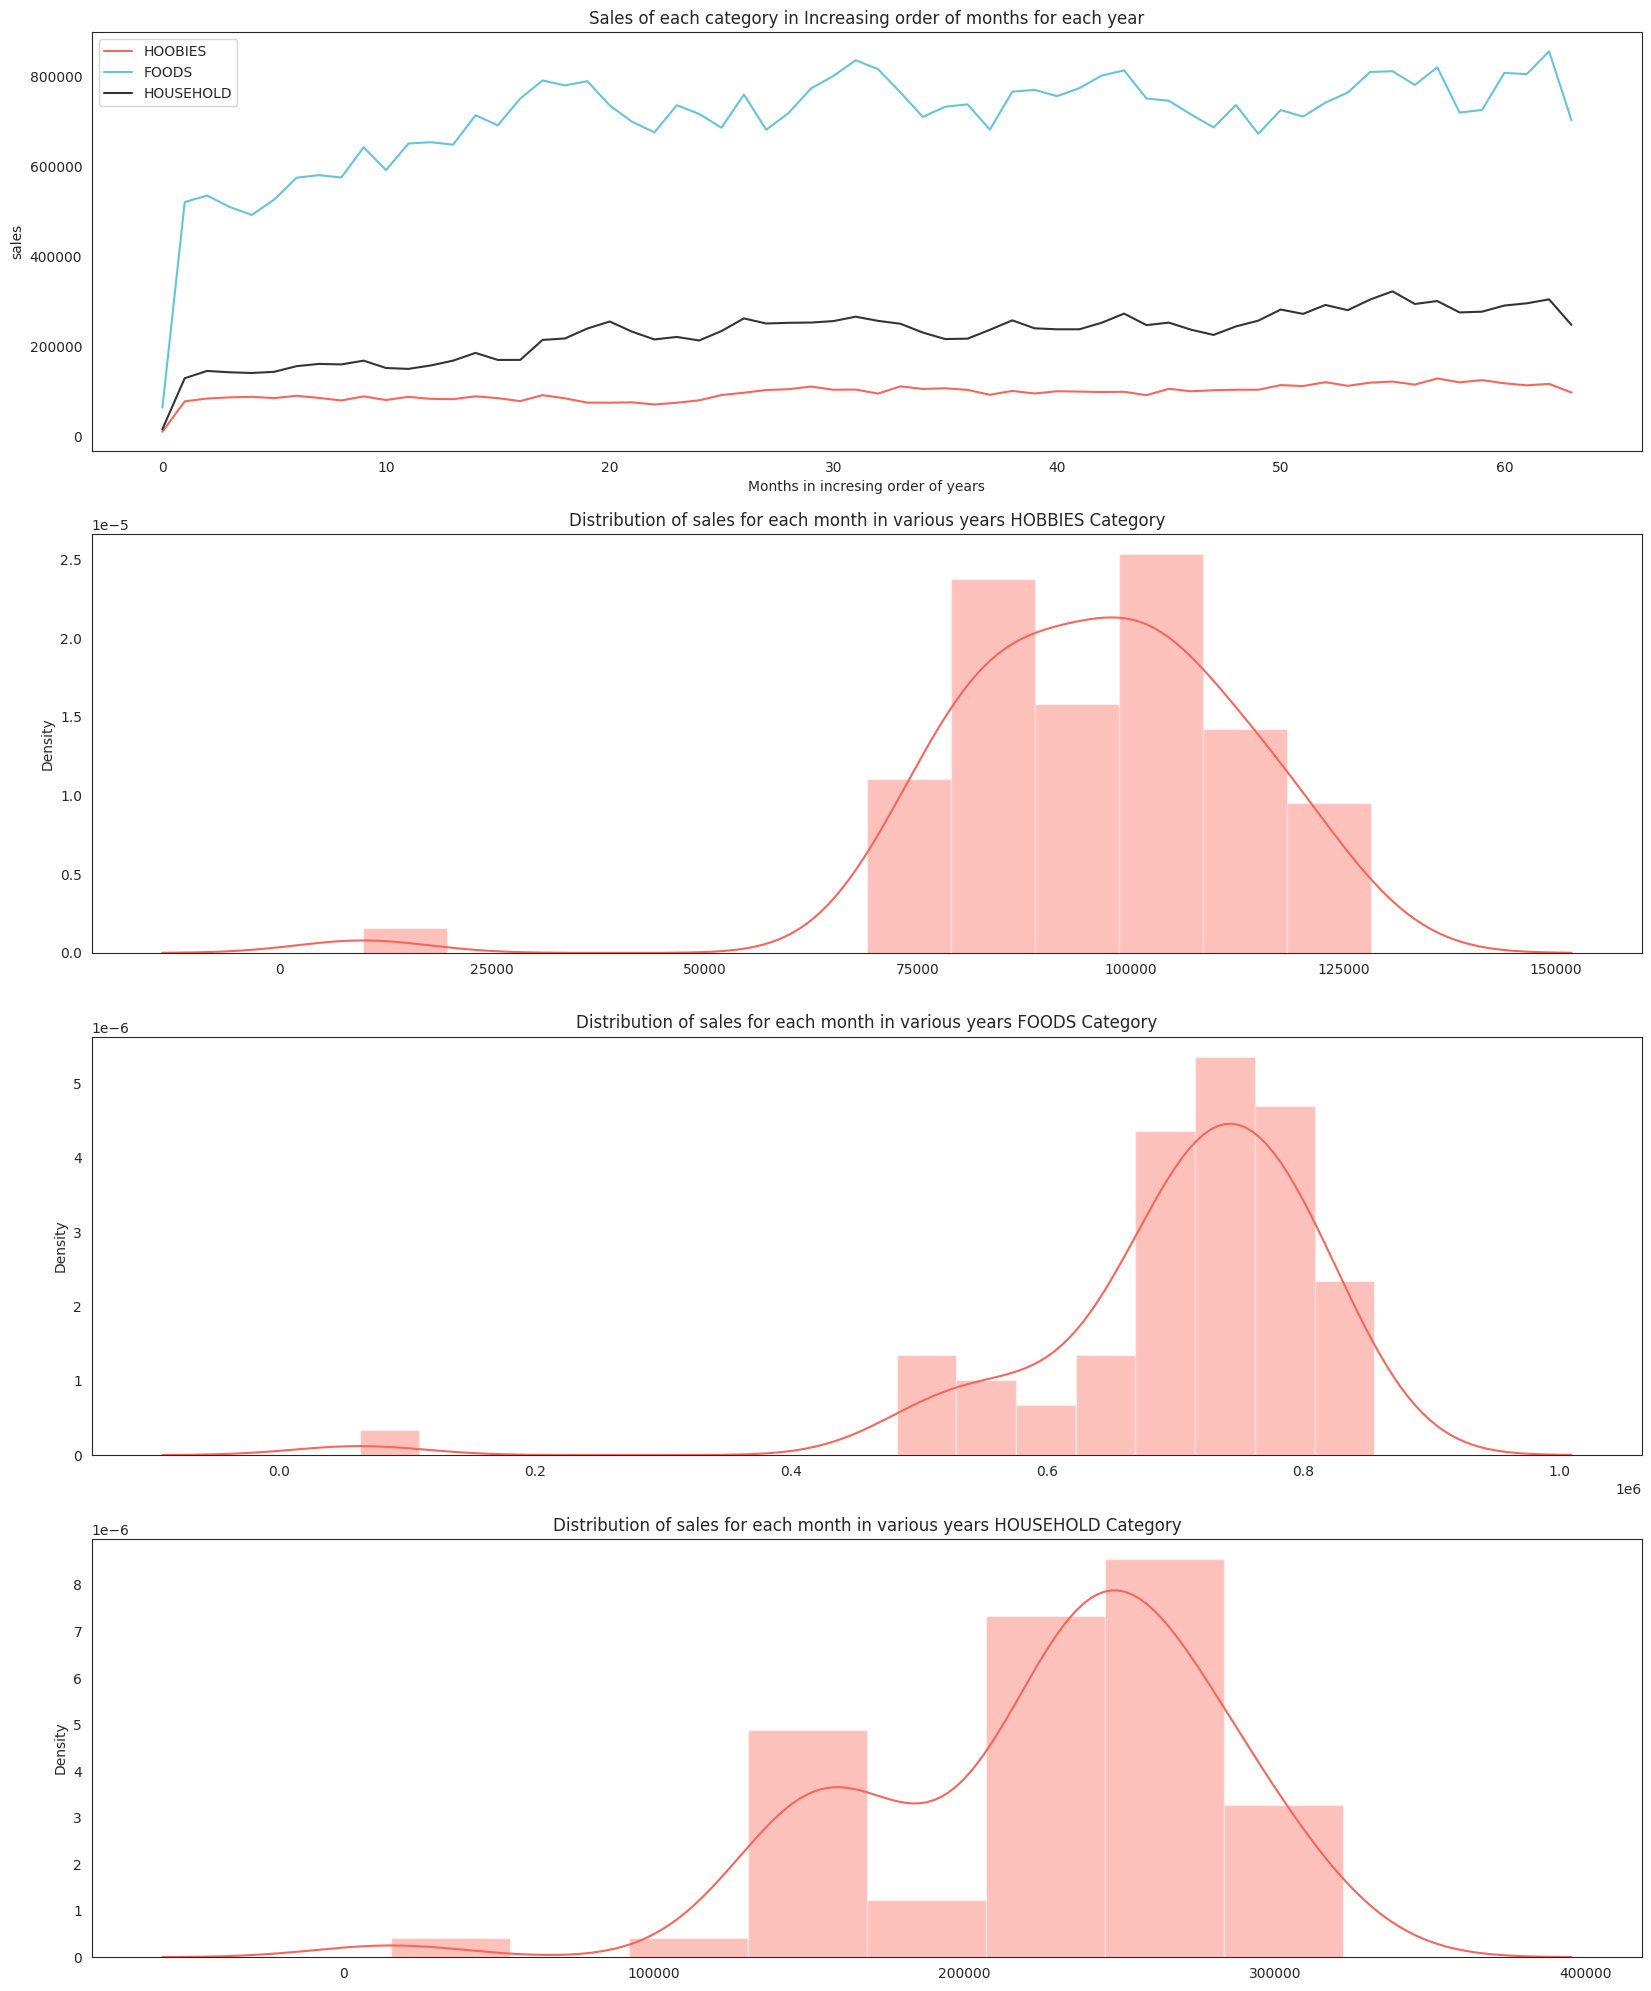

In [ ]:
df=data.groupby(['year','month','cat_id']).sum()
df.reset_index(level=[0,1,2],inplace=True)
plt.figure(figsize=(20,25))
plt.subplot(411)
plt.plot(df[df['cat_id']=="HOBBIES"]['sales'].values,label="HOOBIES")
plt.plot(df[df['cat_id']=="FOODS"]['sales'].values,label="FOODS")
plt.plot(df[df['cat_id']=="HOUSEHOLD"]['sales'].values,label="HOUSEHOLD")
plt.xlabel('Months in incresing order of years')
plt.ylabel('sales')
plt.title("Sales of each category in Increasing order of months for each year")
plt.legend()
plt.subplot(412)
sns.distplot(df[df['cat_id']=="HOBBIES"]['sales'].values)
plt.title("Distribution of sales for each month in various years HOBBIES Category")


plt.subplot(413)
sns.distplot(df[df['cat_id']=="FOODS"]['sales'].values)
plt.title("Distribution of sales for each month in various years FOODS Category")


plt.subplot(414)
sns.distplot(df[df['cat_id']=="HOUSEHOLD"]['sales'].values)
plt.title("Distribution of sales for each month in various years HOUSEHOLD Category")

plt.show()